# Thresholding method

## Importing Libraries

In [28]:
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mahotas

## Loading image from disk

In [7]:
img = cv2.imread("images/but_foot.jpg")

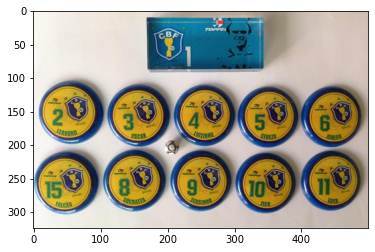

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Thresholding

**Simple threshold**


In [8]:
# converting the image into gray scale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# applying the Gaussian blur
blurred = cv2.GaussianBlur(img, (5,5), 0)

In [22]:
# applying the simple threshold
(T, sthresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
# applying the inverse threshold
(T, ithresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
# applying the bitwise operation with the inverse threshold
masked = cv2.bitwise_and(img, img, mask = ithresh)

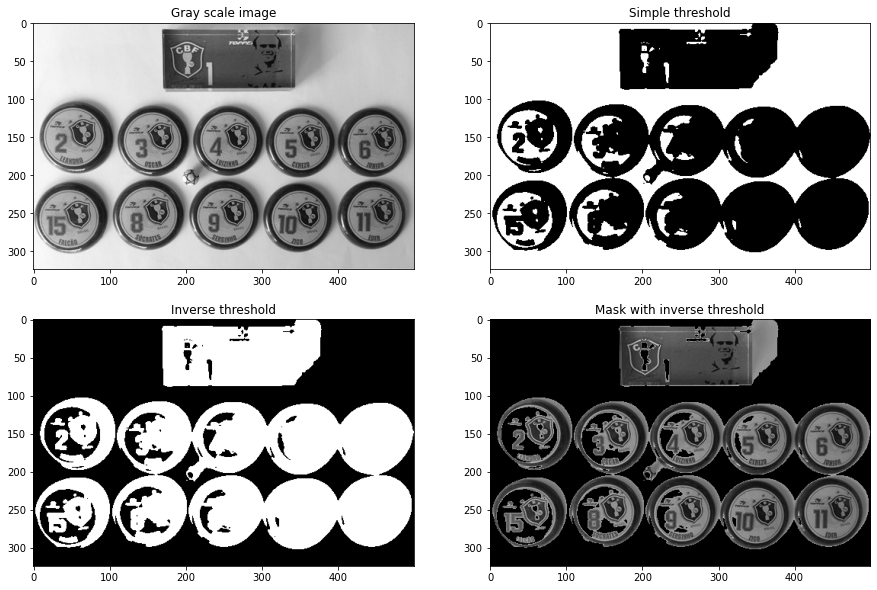

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Simple threshold")
plt.imshow(cv2.cvtColor(sthresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Inverse threshold")
plt.imshow(cv2.cvtColor(ithresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.title("Mask with inverse threshold")
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

plt.show()

**adapitative threshold**

In [24]:
mthresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
gthresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

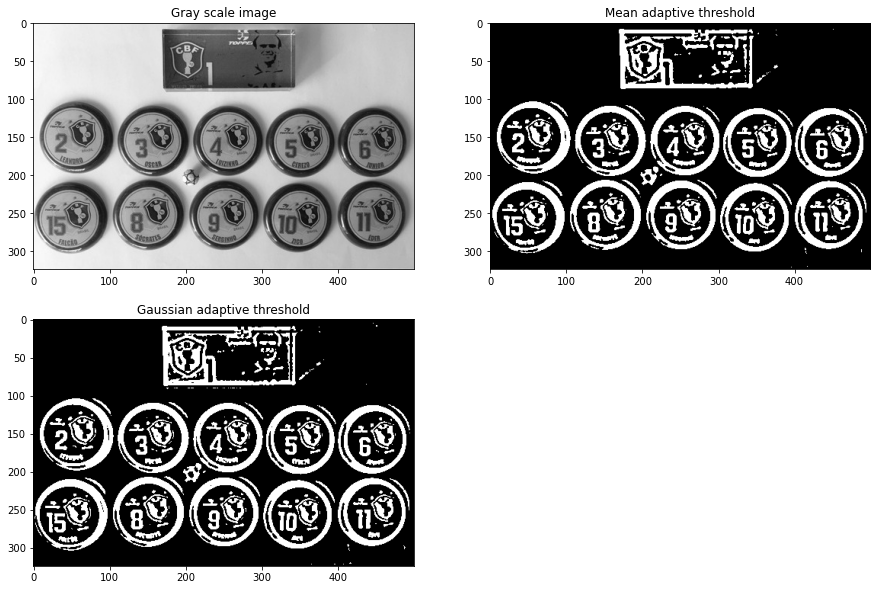

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Mean adaptive threshold")
plt.imshow(cv2.cvtColor(mthresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Gaussian adaptive threshold")
plt.imshow(cv2.cvtColor(gthresh, cv2.COLOR_BGR2RGB))
plt.show()

**Otsu and Riddler-Calvard**

In [44]:
# Otsu method
To = mahotas.thresholding.otsu(blurred)
print("Otsu’s threshold: {}".format(To))
othresh = img.copy()
othresh[othresh > T] = 255
othresh[othresh < 255] = 0
othresh = cv2.bitwise_not(othresh)

# Riddler-Calvard
Trc = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard’s threshold: {}".format(Trc))
rcthresh = img.copy()
rcthresh[rcthresh > T] = 255
rcthresh[rcthresh < 255] = 0
rcthresh = cv2.bitwise_not(rcthresh)

Otsu’s threshold: 147
Riddler-Calvard’s threshold: 146.79819612910552


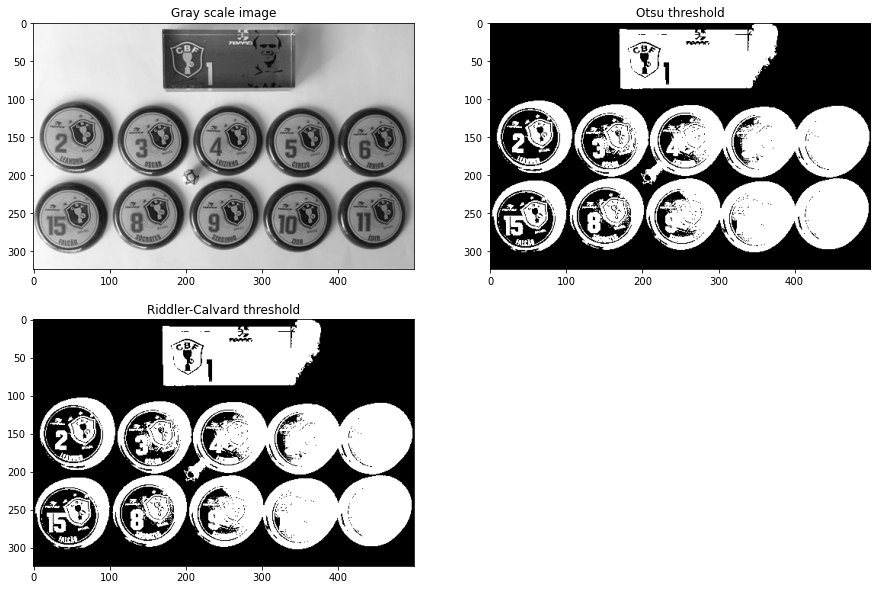

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Otsu threshold")
plt.imshow(cv2.cvtColor(othresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Riddler-Calvard threshold")
plt.imshow(cv2.cvtColor(rcthresh, cv2.COLOR_BGR2RGB))
plt.show()